In [1]:
from random import random, seed, randrange
from math import floor, pi
import numpy as np
import os
from time import time
import pandas as pd
from time import time

In [2]:
import matplotlib.pyplot as plt
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]
import os

In [3]:
%run -i "gcmc.py"

In [5]:
yco = 1
P_res = 200*10**5 #[Pa]
T = 30 + 273.15 #K
fco, fme = PR_Fugacity( P_res/10**5, T, yco )
fco = fco*10**5
fme = fme*10**5

del_sf = "Nothing"#3.35 #[A]
rho_sf = "Nothing"#0.114 #[A^-3]
W = "Nothing"#5*3.8 #[A] relative to diameter of methane 3.80A
sf = False
mega_verbose = False

s_box = 30
N_max = 50000
Vol = s_box**3
kb = 1.3806*10**(7) #[Pa*A^3/K]
Nco = 0 #floor(fco*Vol/kb/T)
Nme = 0 #floor(fme*Vol/kb/T)
Nc = 0
rc = s_box
beta = 1/T
zz_co = beta*fco
zz_me = beta*fme
delta = 1
pi_move = 0.5

N_moves = 1000
N_equil = 0
N_prod = int( np.round( 200000/N_moves) )

t0 = time()
rhocov,rhomev,Env,Pv,Ncov, Nmev = mc_run(verbose = True)
t1 = time()
print( t1 - t0 )

0 yco:  1.0 N:  33 P:  44.0 En:  -84.47 Accept%: 0.935 0.812 0.514
20 yco:  1.0 N:  271 P:  -57.37 En:  -782.66 Accept%: 0.457 0.264 0.231
40 yco:  1.0 N:  314 P:  30.83 En:  -891.39 Accept%: 0.513 0.065 0.056
60 yco:  1.0 N:  325 P:  69.33 En:  -926.83 Accept%: 0.51 0.048 0.045
80 yco:  1.0 N:  303 P:  162.69 En:  -869.74 Accept%: 0.509 0.047 0.052
100 yco:  1.0 N:  340 P:  166.68 En:  -968.69 Accept%: 0.507 0.049 0.041
120 yco:  1.0 N:  326 P:  189.66 En:  -915.49 Accept%: 0.502 0.036 0.042
140 yco:  1.0 N:  336 P:  268.94 En:  -956.42 Accept%: 0.497 0.039 0.037
160 yco:  1.0 N:  317 P:  208.11 En:  -914.8 Accept%: 0.509 0.042 0.044
180 yco:  1.0 N:  325 P:  159.78 En:  -923.12 Accept%: 0.488 0.047 0.045
109.20633125305176


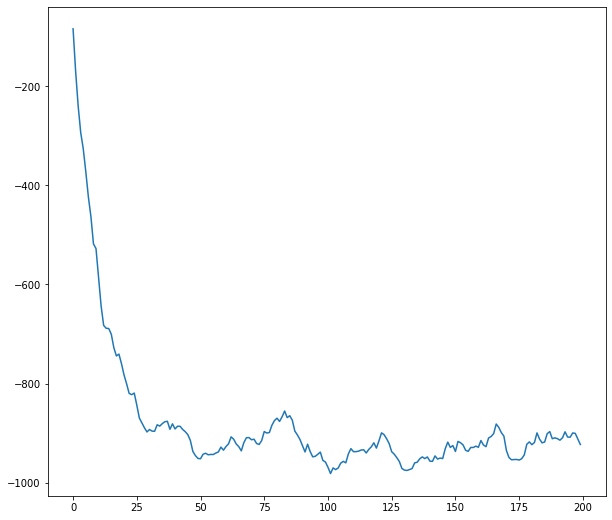

In [6]:
plt.plot( Env)

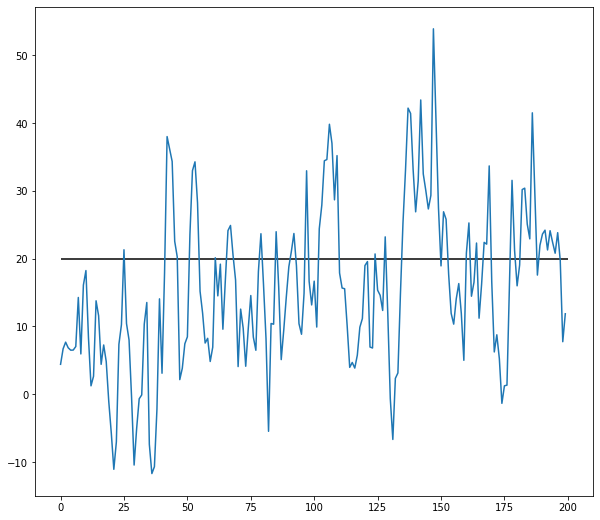

In [9]:
plt.plot( Pv )
plt.hlines( y = 20, xmin = 0, xmax = N_prod)

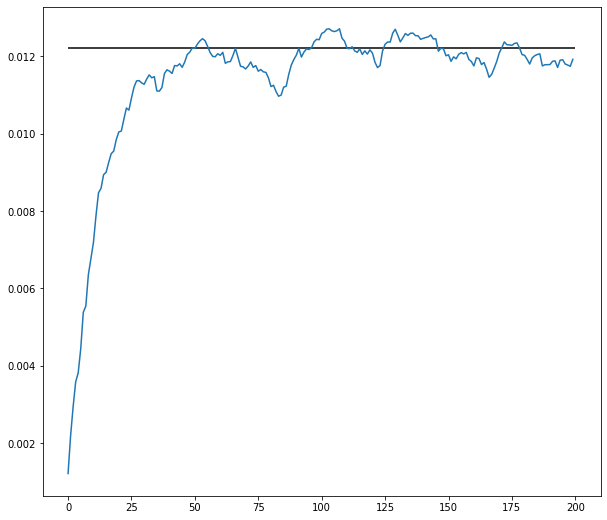

In [10]:
plt.plot( rhocov )
z = PR_Zmix(200, T, 1)
rho = 200*10**5/z/kb/T
plt.hlines( y = rho, xmin = 0, xmax = N_prod)

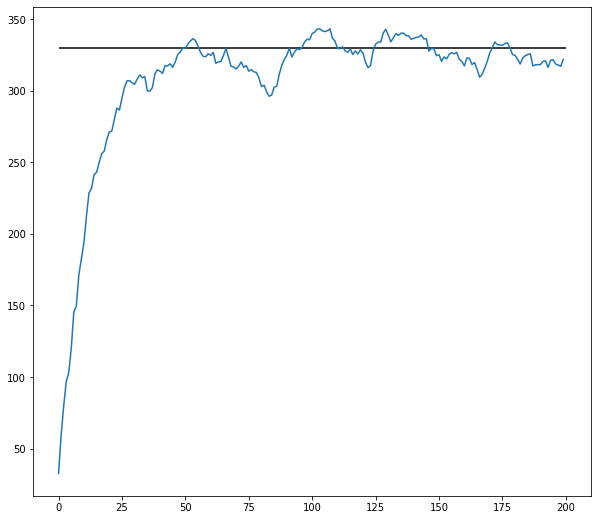

In [12]:
plt.plot( rhocov*Vol )
z = PR_Zmix(200, T, 1)
N_part = 200*10**5/z/kb/T*Vol
plt.hlines( y = N_part, xmin = 0, xmax = N_prod)